In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

## Load Data 

In [3]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Scale Images

In [4]:
scaler = StandardScaler()

x_train_scaler = scaler.fit(x_train)
x_train = x_train_scaler.transform(x_train)
x_test = x_train_scaler.transform(x_test)

y_train = np.array(y_train, dtype=np.int)

## Random Forest

In [26]:
#bag_clf = BaggingClassifier(
 #DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 #n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1)

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16,n_jobs=-1)

rnd_clf.fit(x_train, y_train.ravel())

y_pred_rf = rnd_clf.predict(x_test)


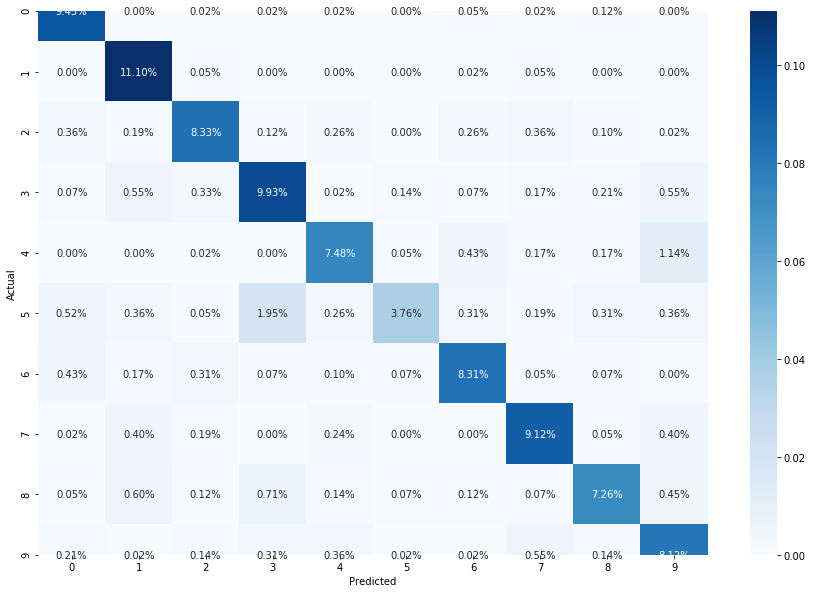

In [27]:
accuracy = plot_confusion_matrix(y_test, y_pred_rf, fig_size=(15, 10))

In [28]:
print(f'Accuracy {accuracy}')

Accuracy 0.8285714285714286
